# 统计与实验设计思维

## 实际案例问题

**问题1：天辰项目空调是否需要更换成功率更大的？**

1. 背后的统计问题是什么？
2. 怎么去做对照实验？
3. 我们会不会挑了一个天气特别热的特殊日子做了实验，得出了错误的结论？

**问题2：BMS均衡功能是否有用？**

1. “有用”是什么意思？
2. 挑哪些packs去做实验？
3. 最后如何得出分析数据？

首先我们会先介绍基本的统计学概念和实验设计上的原理，然后再会回到这两个问题上来。

参考：
- https://36kr.com/p/1723119190017
- https://51xxziyuan.com/58/2004.html
- Numpy案例 https://data-flair.training/blogs/numpy-statistical-functions/

---

## 基本统计学概念

### 统计特征 (Statistical Features)

统计特征可能是数据科学中最常用的统计概念。它通常是你在研究数据集时使用的第一种统计技术，包括偏差（bias）、方差（variance）、平均值（mean）、中位数（median）、百分位数（percentiles）等。这很好理解，在代码中也非常容易实现。下图可以说明这些特征。

中间的那条线是数据的中位数（median），中位数比平均值（mean）更常用，因为它更不容易受到极端数值的影响。第一四分位数（first quartile，Q1）实际上是第25%的数，换句话说，是样本所有数值由小到大排列后第25%的数字。第三四分位数（third quartile，Q3）是第75%的数，即样本所有数值由小到大排列后第75%的数字。上限和下限即样本数据非异常范围内的最大值和最小值。第一四分位数和第三四分位数组成箱须图中的箱子（box plot），第一四分位数-下限以及第三四分位数-上限连接的线段即须（whisker）

箱须图完美地说明了我们可以用基本统计特征得出什么结论：

- 当箱子较短时，意味着样本的数据差别不大，因为在较小范围里有许多值。


- 当箱子较长时，意味着样本的数据差别很大，因为数据分散在较大范围内。

如果中位数接近箱子底部，那么就意味着样本中更多数据的数值较小，呈左偏态分布；如果中位数接近箱子顶部，那么就意味着样本中更多数据的数值较大，呈右偏态分布。基本上，如果中位数的那条线不在箱子中间，那么就意味着数据分布偏态。

所有这些信息都来自于很容易计算的简单统计特征！当你需要快速获取有意义的数据统计图时，你可以试着画箱须图。


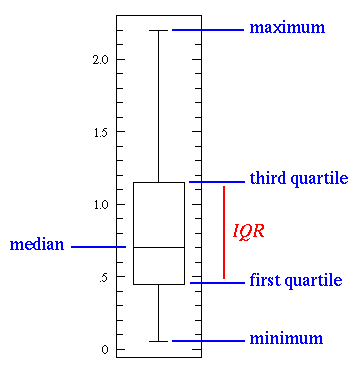

In [8]:
Image(filename='sample_data/images/i1.gif') 

In [21]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

from IPython.display import Image

In [12]:
a = np.random.rand(20) 
print(a)
print("----------")

print(np.min(a))
print(np.max(a))
print(np.argmin(a))
print(np.argmax(a))

print(np.mean(a))
print(np.median(a))
print(np.percentile(a, q=25))

print(np.std(a))
print(np.var(a))

[0.12808924 0.94187024 0.82539955 0.68323135 0.75464446 0.83907404
 0.85323054 0.44693153 0.23045714 0.31224112 0.15868006 0.60406612
 0.31935299 0.45482401 0.89366723 0.58007631 0.94944665 0.51708547
 0.983906   0.167999  ]
----------
0.1280892381382881
0.9839060019273715
0
18
0.5822136523355709
0.592071213038828
0.3175750263781816
0.28488830413252064
0.08116134583150358


**以电池均衡实验数据为例**

In [27]:
data = pd.read_csv("sample_data/data_cell.csv")
# cell_balancing: 均衡开启前/后
# charge_ah: 充电容量Ah数
# discharge_ah: 放电容量Ah数
data.sample(5)

# 画出箱须图
fig = go.Figure()
fig.add_trace(go.Box(x=data["cell_balancing"], y=data["charge_ah"], name="充电容量"))
fig.add_trace(go.Box(x=data["cell_balancing"], y=data["discharge_ah"], name="放电容量"))
fig.update_layout(template="simple_white")
fig.update_layout(boxmode='group') # group together boxes of the different traces for each value of x
fig.show()

### 概率分布 (Probability Distributions)

概率能够反映随机事件出现的可能性大小。在数据科学中，概率通常被量化在0-1之间，概率为0意味着不可能事件（一定条件下必然不发生的事件），概率为1表示必然事件（一定条件下必然发生的事件）。概率分布是一个函数，表示实验中所有可能值的概率。下图可以帮你理解概率分布。

- **均匀分布（Uniform Distribution）** 是3种概率分布中最基本的一种。它在区间内只有一个值，也就是说在相同长度间隔的分布概率是等可能的，范围之外的概率都是0。相当于一个“开或关”的分布。我们也可以把它看作是一个有两个类别的分类变量：0或者那个一定的值。你的分类变量可能有多个值，不仅仅是0，但我们可以把它看作多重均匀分布的分段函数。


- **正态分布（Normal distribution）** 又称高斯分布（Gaussian Distribution），由其平均值和标准差定义。正态分布的对称轴是样本平均值，随着样本平均值的变化在坐标轴上左右移动，标准差描述了正态分布的离散程度（即数据是广泛分布还是高度集中）。它由平均数所在处开始，分别向左右两侧逐渐均匀下降。与其他分布（如泊松分布）相比，正态分布的标准偏差在所有方向上都是相同的。因此，通过正态分布，我们就可以清楚知道样本的平均值和离散程度。


- **泊松分布（Poisson Distribution）** 和正态分布相似，但多了偏斜率。如果偏度值非常小，那么泊松分布在各个方向上的分布就和正态分布相似，相对均匀。但当偏度值很大时，数据在不同方向上的分布就不同：在一个方向上，它将非常分散；而在另一个方向上，它将高度集中。泊松分布很适合描述单位时间内随机事件发生的次数。

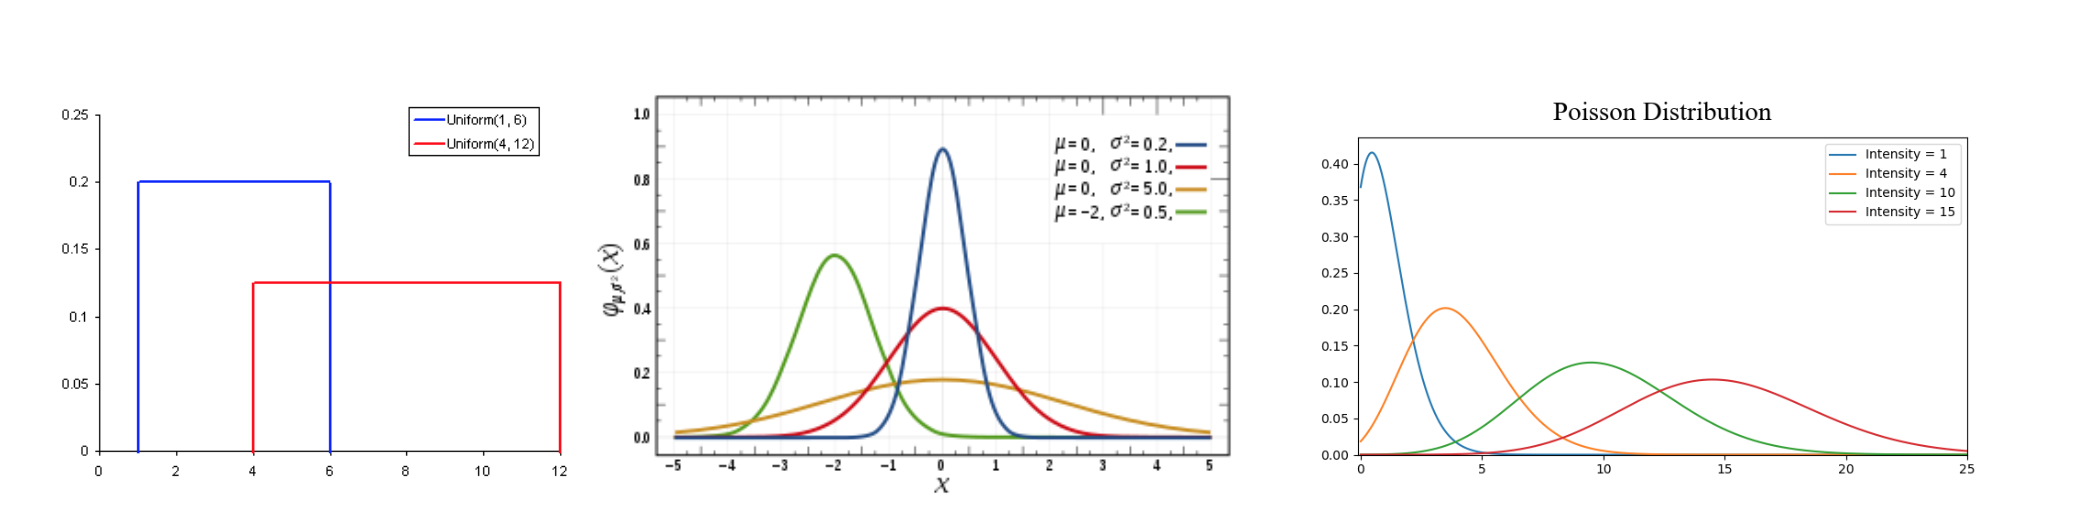

In [10]:
Image(filename='sample_data/images/i2.png') 

### 总体与参数 (Population and Parameters)

**总体** 是一个或一组对象，代表了感兴趣的特定分组或类别的所有成员。例如想要知道常州所有工程师的平均收入水平，那么对每一位工程师的收入情况的统计就构成我们观察的总体。

如果搜集这些数据并计算均值，就可得到一个**参数**。参数是来自于总体，并适用于总体的值。在统计学中，参数用希腊字母表示，如均值μ、标准差σ、概率π等等。

### 样本与统计量 (Sample and Statistics)

根据随机化原则，从总体中随机抽取一定数量的个体，组成**样本**。例如，因为种种原因，我们并不能获取常州地区每位工程师的收入情况。在这种情况下，我们可以从某些公司职工的名单上随机选取工程师的一个子集，然后计算这个子集的平均收入。这样的集合就是样本，集合包含的观察单位数称为该样本的样本含量（Sample size），从样本中计算出的均值称为**统计量**。统计量是从样本数据中计算出的值。在统计学中，统计量用英语字母标志，如均值x͞，样本标准差s，样本率p等等。

In [29]:
# 总体数量（假设为200）
population_size = 200
# 样本含量
smaple_size = 5
# 样本率
sample_rate = smaple_size / population_size

# 均值
before_charge_ah_avg = np.mean(data[data["cell_balancing"] == 0]["charge_ah"])
after_charge_ah_avg = np.mean(data[data["cell_balancing"] == 1]["charge_ah"])
print(before_charge_ah_avg, after_charge_ah_avg)
before_discharge_ah_avg = np.mean(data[data["cell_balancing"] == 0]["discharge_ah"])
after_discharge_ah_avg = np.mean(data[data["cell_balancing"] == 1]["discharge_ah"])
print(before_discharge_ah_avg, after_discharge_ah_avg)

# 标准差
before_charge_ah_std = np.std(data[data["cell_balancing"] == 0]["charge_ah"])
after_charge_ah_std = np.std(data[data["cell_balancing"] == 1]["charge_ah"])
print(before_charge_ah_std, after_charge_ah_std)
before_discharge_ah_std = np.std(data[data["cell_balancing"] == 0]["discharge_ah"])
after_discharge_ah_std = np.std(data[data["cell_balancing"] == 1]["discharge_ah"])
print(before_discharge_ah_std, after_discharge_ah_std)

265.68 268.05833333333334
264.62 266.63000000000005
0.6705221845696069 1.5486382907430483
0.7054076835419293 1.8010459923796174


### 抽样 (Sampling)

从总体中抽取部分观察单位的过程称为**抽样（Sampling）**。

为了保证样本的代表性，抽样时必须遵循**随机化（Randomization）原则**。随机抽样的最大好处就是可以保证样本与抽样总体之间的差异是随机的，而不是系统性的，即不会是抽样的结果出现一边倒的情况(系统误差)。例如，研究者从常州高新园区里的企业中选取样本，于是就可能选择收入水平稍微更高的工程师，导致最后的结论出现偏差。

到底怎样才算是随机抽样呢？用统计学的术语来说，指的是总体中的每一个对象被选入样本的概率相等。请注意，随机抽样和随意抽样是两个截然不同的概念。

### 误差 (Error)

误差泛指实测值与真值之间，按照其产生原因和性质可粗分为随机误差（random error）与非随机误差（nonrandom error）两大类，后者又可分为系统误差(systematic error)与非系统误差(nonsystemstic error)两类。

- **随机误差**：是一类不恒定、随机变化的误差，由多种尚无法控制的因素引起。例如，在实验过程中，在同一条件下对同一对象反复进行测量，虽极力控制或消除系统误差后，每次测量结果仍会出现一些随机变化，即随机测量误差, 以及在抽样过程中由于抽样的偶然性而出现的抽样误差。

    - 随机误差是不可避免的，在大量重复测量中，或在抽样过程中，它可出现或大或小或正或负的，呈一定规律性的变化。但由于造成随机误差的影响因素太多太复杂，以至无法掌握其具体规律。随着科学的发展与社会的进步，有些随机误差可能会逐渐被认识而得以控制。随机误差呈正态分布，可用医学统计学的方法进行分析。统计分析主要是针对抽样误差而言的，在接下来的推文中我们会详细的谈及。


- **系统误差**：是实验过程中产生的误差，它的值恒定不变，或遵循一定的变化规律， 其产生原因往往是可知的或可能掌握的。例如，可能来自于受试者抽样不均匀，分配不随机，可能来自于不同实验者个人感觉或操作上的差异，可能来自于不标准的仪器，也可能来自于外环境非实验因素的不平衡等。因而应尽可能设法预见到各种系统误差的具体来源，力求通过周密的研究设计和严格的技术措施加以消除或控制。


- **非系统误差**：在实验过程中由研究者偶然失误而造成的误差。例如，仪器失灵抄错数字、点错小数点、写错单位等，亦称为过失误差(Gross error)。这类误差应当通过认真检查核对予以清除，否则将会影响研究结果的准确性。


### 研究设计 (Study Design)

社会科学家用到很多种研究方法与设计，包括实验设计(Experimental design)和相关性研究设计(Correlational research designs)。

- **实验设计**：实验者将样本中的观察分成不同组，然后就感兴趣的一个或多个变量进行组间比较。例如，学校领导可能想知道新的数学课程方案是否比旧方案更好。选取一个由40名学生组成的样本，随机分配(Random assignment)其中20名使用旧课程方案，另外20名则使用新课程方案。然后检验各组，看哪组学到的数学知识更多。其中使用随机分配方式将学生分成两组，目的是使两组间的任何重要差异都在两组之间平均分布，从而两组考试分数的任何差异只能归因于两种课程教学方案的效果差异。当然，事实可能并非如此，可能与学生的学习能力、兴趣爱好等多方面因素有关，但在此假设的案例中我们暂且认为除接受的课程不一致外，其他因素均一致。


- **相关性研究设计**：也是社会科学中常用的研究方法。在这类研究中，参与者通常不经过随机分组，研究者一般也不能施加实际控制。相反，研究者只能收集若干变量的数据，然后进行某些统计分析以确定不同变量之间彼此相关的强度。例如，某企业老板感兴趣的问题可能是:雇员的生产率是否与其(在家而非上班时间的)睡眠时间相关？于是，可选取一个包括100名成年工人在内的样本，测量其工作生产率以及给定一周内平均每晚的睡眠时间，也许就会发现睡眠时间与生产率之间存在强相关关系。现在我们想从逻辑上论证这说得通，因为工人只有休息好才能努力工作，也才更有效。尽管这一结论言之成理，但仅凭具有相关性的数据就得出如此结论则过于穿凿。相关性研究只能提供变量间是否相关的信息，而不能得出关于因果关系的结论。别忘了，还有一种可能是更有效的工作导致了在家睡眠时间更长，也许顺利完成工作可以舒缓压力，也许可以让工人早上多睡一会儿， 不管哪种情况都会造成更长时间的睡眠。

## 假设驱动的实验设计

1. 有关**假设检验**的介绍：https://www.cnblogs.com/huzihu/p/9692828.html

2. 有关**实验设计原则**的介绍：http://www.bioon.com.cn/protocol/showarticle.asp?newsid=5514

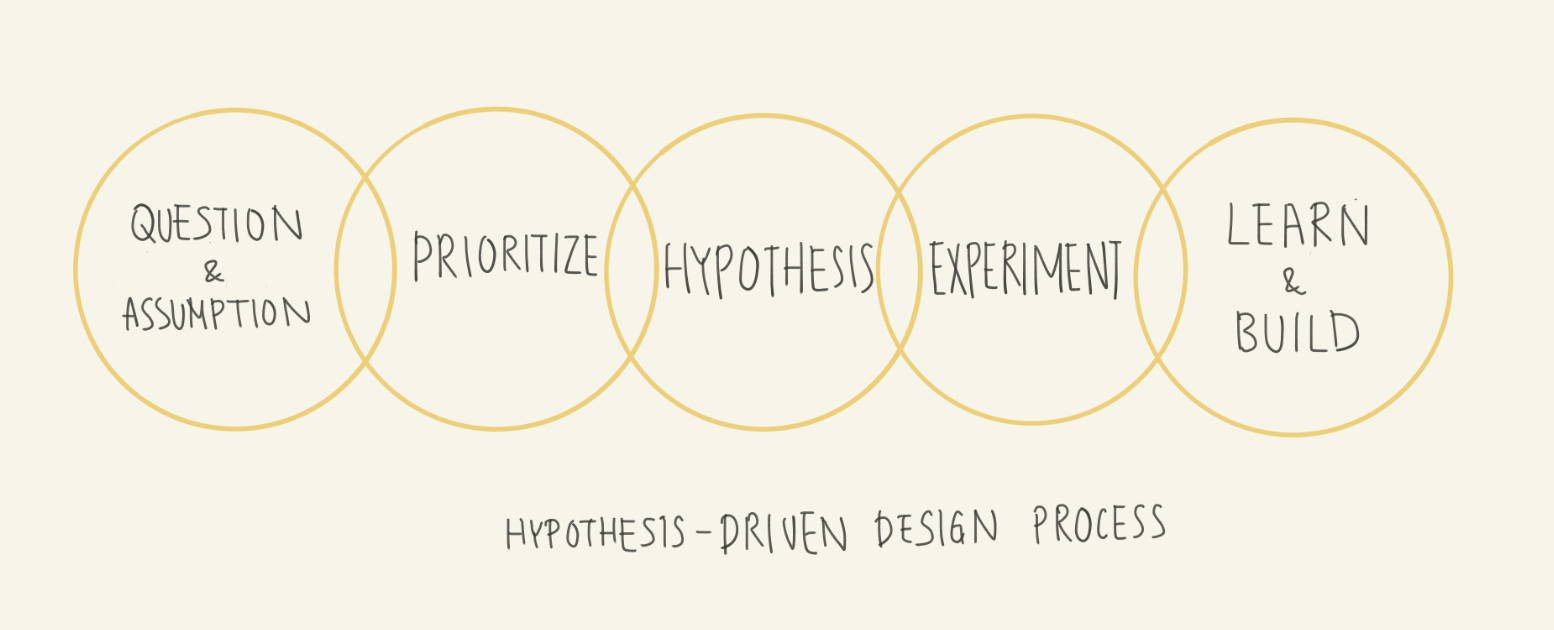

In [31]:
Image(filename='sample_data/images/i3.png') 




### 假设检验的步骤:

1. 定义总体

2. 确定原假设和备择假设

3. 选择检验统计量（确定假设检验的种类）

4. 选择显著性水平

5. 从总体进行抽样，得到一定的数据（经过实验过程）

6. 根据样本数据计算检验统计量的具体值

7. 依据所构造的检验统计量的抽样分布和显著性水平，确定临界值和拒绝域

8. 比较检验统计量的值与临界值，如果检验统计量的值在拒绝域内，则拒绝原假设


### 实验设计的原则：

1. 随机原则：即运用“随机数字表”实现随机化；运用“随机排列表”实现随机化；运用计算机产生“伪随机数”实现随机化。 尽量运用统计学知识来设计自己的实验，减少外在因素和人为因素的干扰。

2. 对照原则：空白对照组的设立——只有通过对照的设立我们才能清楚地看出实验因素在当中所起的作用。当某些处理本身夹杂着重要的非处理因素时，还需设立仅含该非处理因素的实验组为实验对照组；历史或中外对照组的设立一一这种对照形式应慎用， 其对比的结果仅供参考，不能作为推理的依据；多种对照形式同时并存。

3. 重复原则：所谓重复原则，就是在相同实验条件下必须做多次独立重复实验。一般认为重复5次以上的实验才具有较高的可信度。 

4. 平衡原则：一个实验设计方案的均衡性好坏，关系到实验研究的成败。应充分发挥具有各种知识结构和背景的人的作用， 群策群力，方可有效地提高实验设计方案的均衡性。在实验设计的过程中要注意时间上的分配，只有在时间上分配好了，才不会出现一段时间特别忙而一段时间特别闲的情况。

5. 弹性原则：所谓空格，指的是在时间分配图上留有空缺。适当的空缺是非常必要的，只有这样才能富有弹性的实施实验计划，并不断地调整好自己的实验进度。

6. 最经济原则：不论什么实验，都有它的最优选择方案，这包括在资金的使用上，也包括人力时间的损耗上，必要时可以预测一下自己实验的产出和投入的比值，这个比值越大越好，当然是以你所拥有的实验条件作基础的。


## 实际案例分析

### 空调实验效果的问题

研究背景：天辰/锆匠等项目的空调是否需要更换成功率更大的型号？

**3个遗留的问题：**

1. 背后的统计问题是什么？

2. 怎么去做对照实验？

3. 我们会不会挑了一个天气特别热的特殊日子做了实验，得出了错误的结论？

**清单：**

1. 实验对象（定义总体）：集装箱里所有的电池包（电芯）

2. 实验因素（所有影响实验结果的条件）：环境温度、充放电功率、时间等

3. 实验目的（确定原假设）：
    - 空调可以**控制住**电芯的**温度**

4. 实验指标（衡量实验因素作用强弱的指标）：电芯温度

4. 实验方法（选择统计量和统计方法）：时间上对照
    - 怎么选取样本？选取哪些样本？
    - 选择那些统计量来描述指标？
    - 怎么获取数据？怎么处理数据？
    
5. 分析

6. 实验结论


### 电池均衡效果的问题 

**3个遗留的问题：**

1. “有用”是什么意思？

2. 挑哪些packs去做实验？

3. 最后如何得出分析数据？

**清单：**

1. 实验对象（定义总体）：单个电池包（电芯）

2. 实验因素

3. 实验目的（确定原假设）：
    - 均衡功能可以提升电池包的容量

4. 实验指标：电池包容量

5. 实验方法（选择统计量和统计方法）：空间上的对照
    - 怎么选取样本？选取哪些样本？
    - 选择那些统计量来描述指标？
    - 怎么获取数据？怎么处理数据？

5. 分析

6. 实验结论
